# Descriptive statistics: common pdf and CDF

- [Recap on quantities describing distribution functions](#Descriptive)
    * [Population Statistics](#Population-statistics)
    * [Sample Statistics](#Sample-statistics)
    * [Bias of an estimator](#Bias-of-an-estimator:)
    * [Statistics of multivariate distributions](#Statistics-of-multivariate-distributions:)
    * [Change of variable](#Change-of-variable)
- [Some very common Univariate distributions](#Some-very-common-distributions:)  
    * [Bernouilli distribution](#Bernoulli)
    * [Uniform distribution](#Uniform-distribution)
    * [Binomial distribution](#Binomial)
    * [Hypergeometric distribution](#Hypergeometric)
    * [Poisson distribution](#Poisson-distribution)
    * [Geometric distribution](#Geometric-distribution)
    * [Gaussian distribution](#Gaussian-or-normal-distribution)
    * [Chi2 distribution](#chi2)
    * [Student's distribution](#Student's-distribution)
    
- [References and supplementary material](#X.-References-and-supplementary-material:)

In [8]:
#Modules to be used in this notebook
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
#%matplotlib inline    # No need to use %matplotlib inline if I use plt.show after running my code !
#from IPython.html.widgets import interact
from ipywidgets import interact

# Recap on quantities describing distribution functions   <a class="anchor" id="Descriptive"></a>



## Population statistics

These are the quantities that allow to define the "location", "shape" and "width" of a distribution $h(x)$. Note here that we consider a description of the "true" (population) distribution, that we why we use the notation $h(x)$ (i.e. this is NOT the distribution we infer from the data but the true underlying distribution). 

### Arithmetic mean (also known expectation value):

$$
\mu \, =\, E(x) \, = \, \int_{-\infty}^{+\infty} x\,h(x)\,{\rm d}x
$$

Note that the "expected/expectation value " is also often writen $<x>$.  

### Variance

$$
V \, = \, \sigma^2 \, = \, \int_{-\infty}^{+\infty} (x-\mu)^2\,h(x)\,{\rm d}x
$$

### Standard deviation

$$
\sigma \, = \, \sqrt{V}
$$

### Skewness

$$
\Sigma = \int_{-\infty}^{+\infty} \left( \frac{x-\mu}{\sigma}\right)^3\,h(x)\,{\rm d}x
$$

Skweness describes how "asymmetric" is the distribution

### Kurtosis

$$
K \, = \, \int_{-\infty}^{+\infty} \left( \frac{x-\mu}{\sigma}\right)^4\,h(x)\,{\rm d}x - 3
$$

Kurtosis describes how "peaky" is the distribution (note the subtraction by 3 which allows us to have K=0 for a gaussian distribution). Kurtosis > 0 means that the distribution if more peaked than a gaussian. 

### Median

$$
\frac{1}{2} \, = \, \int_{-\infty}^{median} \, h(x)\, {\rm d}x
$$

### Mode

$$
0 \, = \, \left. \frac{{\rm d}h} {{\rm d}x} \right\vert_{{\rm mode}} 
$$

### Moment of order k

The moment of order k is defined analogously to the mean (central moment of order 1):
$$
\mu^{\prime}_k \, = E(x^k) = \, \int_{-\infty}^{+\infty} x^k\,h(x)\,{\rm d}x
$$

### Central moment of order k

The central moments of order $k$ are defined analogously to the variance of the distribution (central moment of order $k=2$):
$$
\mu_k \, = \, E((x-\mu^\prime_1)^k) \, = \int_{-\infty}^{+\infty} (x-\mu)^k\,h(x)\,{\rm d}x
$$


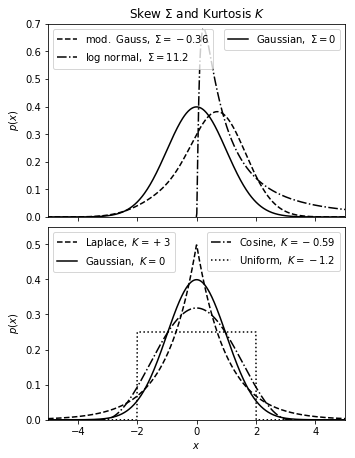

In [6]:
# Figure 3.6 from "Statistics, Data Mining, and Machine Learning in Astronomy"
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(5, 6.25))
fig.subplots_adjust(right=0.95, hspace=0.05, bottom=0.07, top=0.95)

# First show distributions with different skeq
ax = fig.add_subplot(211)
x = np.linspace(-8, 8, 1000)
N = scipy.stats.norm(0, 1)

l1, = ax.plot(x, N.pdf(x), '-k',
              label=r'${\rm Gaussian,}\ \Sigma=0$')

l2, = ax.plot(x, 0.5 * N.pdf(x) * (2 + x + 0.5 * (x * x - 1)),
              '--k', label=r'${\rm mod.\ Gauss,}\ \Sigma=-0.36$')
l3, = ax.plot(x[499:], scipy.stats.lognorm(1.2).pdf(x[499:]), '-.k',
              label=r'$\rm log\ normal,\ \Sigma=11.2$')

ax.set_xlim(-5, 5)
ax.set_ylim(0, 0.7001)
ax.set_ylabel('$p(x)$')
ax.xaxis.set_major_formatter(plt.NullFormatter())

# trick to show multiple legends
leg1 = ax.legend([l1], [l1.get_label()], loc=1)
leg2 = ax.legend([l2, l3], (l2.get_label(), l3.get_label()), loc=2)
ax.add_artist(leg1)
ax.set_title('Skew $\Sigma$ and Kurtosis $K$')

# next show distributions with different kurtosis
ax = fig.add_subplot(212)
x = np.linspace(-5, 5, 1000)
l1, = ax.plot(x, scipy.stats.laplace(0, 1).pdf(x), '--k',
              label=r'${\rm Laplace,}\ K=+3$')
l2, = ax.plot(x, scipy.stats.norm(0, 1).pdf(x), '-k',
              label=r'${\rm Gaussian,}\ K=0$')
l3, = ax.plot(x, scipy.stats.cosine(0, 1).pdf(x), '-.k',
              label=r'${\rm Cosine,}\ K=-0.59$')
l4, = ax.plot(x, scipy.stats.uniform(-2, 4).pdf(x), ':k',
              label=r'${\rm Uniform,}\ K=-1.2$')

ax.set_xlim(-5, 5)
ax.set_ylim(0, 0.55)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

# trick to show multiple legends
leg1 = ax.legend((l1, l2), (l1.get_label(), l2.get_label()), loc=2)
leg2 = ax.legend((l3, l4), (l3.get_label(), l4.get_label()), loc=1)
ax.add_artist(leg1)

plt.show()

An example of distributions with different skewness $\Sigma$ (top panel) and kurtosis $K$ (bottom panel). The modified Gaussian in the upper panel is a normal distribution multiplied by a Gram-Charlier series, with $a_0 = 2$, $a_1 = 1$, and $a_2 = 0.5$. The log-normal has $\sigma = 1.2$.

## Sample statistics

We speak of **sample statistics** when the quantities described above are directly deduced **from the data**. If we assume that we have $N$ measurements ${x_i}$, then we can calculate **estimators** of the various quantities (assuming for the moment that the uncertainty of $x_i$ is negligible - a measurement of $x$ is a delta function-, or at least much smaller than the range of $x_i$) describing the pdf.  

### Estimator of the mean:    

$$
\hat{\mu} \, =\, {\bar{x}} = \sum_{i=1}^{N} \frac{x_i}{N}
$$

There is various notations for the estimator of the mean. Our [book](#book) uses $\bar{x}$, but I prefer the abusive notation that adds a "hat" ($\hat{ }$) on top of the estimated quantity (i.e. estimated based on the data). You may also find $\hat{x}$ for the estimator of the mean. This is an "abusive notation" because ${\hat{\theta}}$ is in principle reserved (in books of statistics) to the MLE (maximum likelihood) estimator of a parameter. In many situations, both are identical (e.g. estimator mean of a gaussian is equal to its MLE estimator).

### Estimator of the Standard deviation:

$$
\hat{\sigma} = \,s \, = \sqrt{\frac{1}{N-1}} \, \sqrt{ \sum_{i=1}^{N} (x_i-\bar{x})^2} 
$$

Note here the factor N-1 because, said shortly, we have already used 1 d.o.f.  to estimate ${\bar{x}}$. Thanks to this "correction", $s^2$ is an *unbiased* estimator of the variance. 

Also, keep in mind that $s$ IS NOT the error on $\bar{x}$. The error on $\bar{x}$ is given by the **standard error on the mean** which is given (for large $N$ and ${\bar{x}}$ following a gaussian distrib.) by:    
$$
stde = \sigma_{\bar{x}}= \frac{s}{\sqrt{N}}
$$

This is a **consequence of the central limit theorem**: for a population (sample) drawn from a distribution $h(x)$ (of finite width / variance), the mean of $N$ values drawn from that distribution follow a Gaussian $N\left(\mu, \frac{\sigma}{\sqrt{N}}\right)$

#### Exercise

Verify empirically the central limit theorem using samples drawn from a uniform distribution 

- (1) Draw a sample of $n$ points from a uniform distribution centered on 0 and of width W=2
- (2) Calculate the mean based on a subsample of M points: e.g. M=2, 3, 10. Repeat this operation $a$ times. Plot the histograms of the mean values. 
- (3) Overplot a normal distribution N(0, $\sigma/\sqrt{N}$)

Tips: 
- `scipy.stats.uniform(loc, loc+scale)` returns a uniform distribution between loc and loc+scale
- `plt.hist(normed=True)` allow you to plot a pdf and not just an histogram
- The standard deviation of a uniform distribution is $W/\sqrt{12}$

### ABOUT VARIANCE calculation by NUMPY:

The variance in numpy is the average of the squared deviations from the mean, i.e., $\sigma^2 = mean(abs(x -$ `x.mean()`$)^2)$, where the mean is calculated as `x.sum()`$/ N$, where $N = $`len(x)`. If, however, `ddof` is specified (i.e. `np.var(x, ddof)`), the divisor $N - {\rm ddof}$ is used instead.

=> If you want to have $N-1$ at the denominator use `np.var(x, ddof=1)`. By default ddof=0. The same is true for the calculation of the standard deviation  `np.std(x, ddof=1)`. 

### Bias of an estimator:

An estimator is called biased, if its value does not converge to the "truth" (i.e. to the quantity it estimates as derived knowing the true distribution). The bias is defined as the *expectation value* (i.e. average) of the difference between an estimator and its population value:

$$
bias(\hat{q}) \, = \, E(\hat{q} - q) \, = <\,\hat{q} - q \,> 
$$
where $q$ represents any statistical quantity, and $\hat{q}$ its estimator. 

In addition to the bias, estimators are also characterized by some *variance* $V$. The *mean squared error* is often used to judge the quality of an estimator: 

$$
{\rm MSE} \, = \, V + bias^2(\hat{q})
$$

Note also that statisticians also speak of "consistency" of an estimator, which is different from the bias. An estimator is called consistent if its value, obtained for an infinitely large sample, converges to its "true" value, and its variance $V$ vanishes. Surprisingly, an estimator can be unbiased, but not consistent. Imagine that you estimate the mean of your sample simply based on the first value you measure (this won't -generally- be a maximum likelihood estimator but you can do this !). Then, even if ~~your sample becomes infinitely large~~ you repeat your experiment an infinitely large number of times, the expectation value of the mean converges to 0 but the expectation of the variance will not. 

## Statistics of multivariate distributions:

We won't have time to explore those in details, nor the generalization to more than 2 random variables. You could e.g. consult Sect. 3.5 and 3.6 of our reference [book](#book) to learn more about multivariate statistics. (see also [Sect. I.4b of Basic-statistics_01.ipynb](Basic-statistics_01.ipynb) ) 

In short, the concepts introduced for univariate distribution are easily extended in 2D and N-D. For example, a 2-D pdf $h(x,y)$ represents the probability for $x$ to be in $[x+{\rm d}x[$ **and** for $y$ to be in $[y+{\rm d}y[$. In addition, we should have $\int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty} \, h(x,y) \, {\rm d}x {\rm d}y = 1$. 

In analogy to univariate distribution, we have the mean and variance defined for $x$ that are:    

$$
\mu_x \, = \, \int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty} \, x \, h(x,y) \, {\rm d}x {\rm d}y 
$$

and 

$$
V_x \, = \, \int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty} \, (x-\mu_x)^2 \, h(x,y) \, {\rm d}x {\rm d}y 
$$

The same quantities are defined for $y$. 

The co-variance, that expresses the dependence between $x$ and $y$, is calculated as:

$$
V_{xy} \, = \, \int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty} \, (x-\mu_x)(x-\mu_y) \, h(x,y) \, {\rm d}x {\rm d}y 
$$

This *covariance* is also written $Cov(x,y)$, and is equal to zero when two variables are independent. 

## Change of variable

It is often necessary to change a probability distribution $h(x)$ into a probability distribution $g(y)$, where $y$ is a function of $x$. For a continuous function, we can write:

$$
h(x)\,{\rm{d}}x = g(y){\rm{d}}y
$$

Indeed, the probability has to be conserved by the change of variable. Consequently, the transformation of the probabilities is just the same as for normal functions:

$$
h(x) = g(y(x)) \, \left| \frac{{\rm{d}}y}{{\rm{d}}x} \right|
$$

In [9]:
# Some function for nice interactive pdf-CDF plot
#import scipy.stats
#import numpy as np
#import matplotlib.pyplot as plt
#%matplotlib inline
##from IPython.html.widgets import interact
from ipywidgets import interact
def plot_dist(x,n, continuous=True, distname=''):
    '''
    x : np.array
        random variable
    n : scipy.stats.ditrib
        Distribution object
    '''
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4.))
    if continuous:
        density = n.pdf
        title = "Probability Density Function (pdf)"
        plot_symbol = '-'
    else:
        density = n.pmf
        title = "Probability Mass Function"
        plot_symbol = 'bo'
        
    distribution = density(x)
    ax1.plot(x, distribution, plot_symbol, color="blue", label=distname)
    if continuous:
        ax1.fill_between(x, 0, distribution, color="blue", alpha=0.6)
    else:
        ax1.vlines(x, 0, distribution, colors='b', lw=5, alpha=0.5)
    ax1.set_title(title)
    
    if distname=='gauss':
    # Plot mean and sigma for gaussian
        x1, x2, x3 = n.mean(), n.mean()-n.std(), n.mean()+n.std()
        ax1.vlines(x1, 0, n.pdf(x1), color='black')
        ax1.vlines(x2, 0, n.pdf(x2), color='red')
        ax1.vlines(x3, 0, n.pdf(x3), color='red')
        
        ax2.hlines(0.5, min(x), n.mean())
        ax2.vlines(n.mean(), 0, 0.5)
        ax2.hlines(0.5-0.3413, min(x), n.mean()-n.std(), color='red')
        ax2.vlines(n.mean()-n.std(), 0, 0.5-0.3413, color='red')
        ax2.hlines(0.5+0.3413, min(x), n.mean()+n.std(), color='red')
        ax2.vlines(n.mean()+n.std(), 0, 0.5+0.3413, color='red')

    cdf = n.cdf(x)
    if continuous:
        ax2.plot(x, cdf, lw=1, color="blue", label=distname)
        ax2.fill_between(x, 0, cdf, color="blue", alpha=0.6)
    else:
        ax2.vlines(x, 0, cdf, colors='b', lw=5, alpha=0.5)
    ax2.set_title("CDF")
    

    return ax1, ax2

# Note, this function is adapted from Daniela Huppenkothen and Fernando Perez 
# https://github.com/dhuppenkothen/ClassicalStatsPython

# Some very common distributions:

Relationship between common pdfs

![CommonPDF](Figures/Common_PDF.png)


### TOC: 
* [Bernouilli distribution](#Bernoulli)
* [Uniform distribution](#Uniform-distribution)
* [Binomial distribution](#Binomial)
* [Hypergeometric distribution](#Hypergeometric)
* [Poisson distribution](#Poisson-distribution)
* [Geometric distribution](#Geometric-distribution)
* [Gaussian distribution](#Gaussian-or-normal-distribution)
* [Chi2 distribution](#chi2)
* [Student's distribution](#Student's-distribution)

## Bernoulli 

This is a distribution defined by a single parameter $p$. There is only *two* outcomes to the experiment: success or failure. 

$$
Ber(k \,|\, p)\,=\,p^k\,(1-p)^{k}  ~~~~ \rm{for}~k~\rm{in}~\{0,1\} 
$$

Parameter: $p$ : Probability of trial being successful

Expectation: $p$

Standard Deviation: $\sqrt{p\,(1-p)}$

Example: The best example of Bernouilli is the situation of a coin-toss (fair or unfair). 

This is a *discrete* distribution for a *variable* $k$ (that takes 2 values: 1 (success) or 0 (failure)).


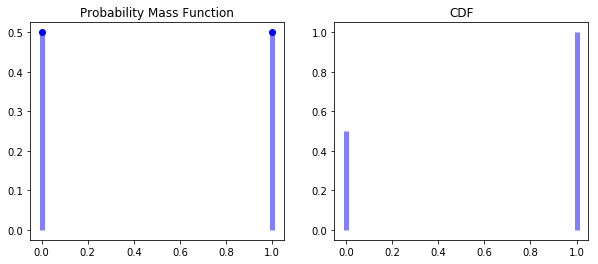

In [10]:
def bernouilli(p):
    n = scipy.stats.bernoulli(p)   
    x = np.linspace(0,1, 2)
    plot_dist(x, n, continuous=False)
    plt.show()
    return

interact(bernouilli, p=(0,1.));    # comment if ipywidget is not installed / does not work
# bernouilli(0.4)   # Run this command if ipywidget does not work - modify params

### Uniform distribution


$$
p(x \, | \, \mu, W) = \frac{1}{W} ~ \mathrm{for}~|x-\mu| \leq \frac{W}{2}, ~\mathrm{and~0~otherwise}
$$

**Parameters:** $\mu$, W 

Expectation: $\mu$

Standard Deviation: W / $\sqrt{12}$

**Example:** Throw a (fair) dice (discrete uniform distribution) 

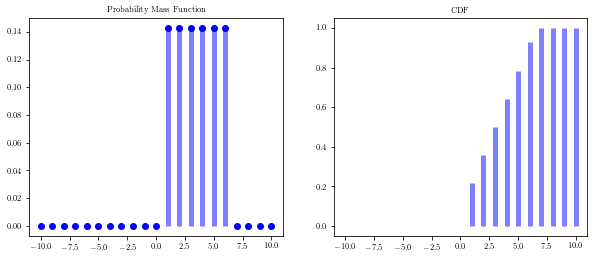

In [67]:
# Discrete version of the uniform distribution (that takes only integer random var)
def uniform_dist(mu,W):
    x = np.linspace(-10, 10, 21)
    m2 = mu-W/2.
    n = scipy.stats.randint(m2, m2+W)   # takes low and high as shape param
    plot_dist(x,n, continuous=False)
    plt.show()
    return

interact(uniform_dist, mu=(-10,10), W=(0.001, 10.0));# comment if ipywidget is not installed / does not work
# uniform_dist(2,4)   # Run this command if ipywidget does not work - modify params

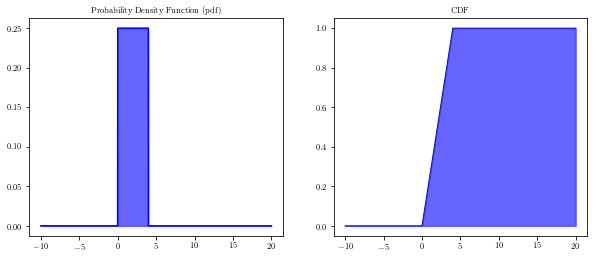

In [62]:
# Continuous version
def uniform(mu,W):
    x = np.linspace(-10, 20, 2000)
    m2 = mu-W/2.
    n = scipy.stats.uniform(m2, W)   # Define m2 because first argument is left edge
    plot_dist(x,n)
    plt.show()
    return

interact(uniform, mu=(-10.,10.), W=(0.001, 10.0));# comment if ipywidget is not installed / does not work
# uniform(2,4)   # Run this command if ipywidget does not work - modify params

### Binomial

A binomial distribution is basically the sum of outcomes of things that follow a Bernoulli distribution.

$$
B(k\,|\,n\,,p) = \binom{n}{k}p^k(1-p)^{n-k} = \frac{n!}{k!\,(n-k)!}\,p^k\,(1-p)^{(n-k)}
$$

**Parameters**: 

* $n$ : Number of trials
* $p$ : Probability of trial being successful

Expectation: $np$

Standard Deviation: $\sqrt{n\,p\,(1-p)}$

This is a *discrete* distribution for a *variable* $k$ (that takes only integer values). It is the distribution of *random variables that can take only two values* (i.e. success/failure; event happening/event not happening, ...). The distribution of the random variable $k$, $B(k|n,p)$, measures how many times success occured amoung $n$ trials.

**Example:** 
- Toss a fair coin n times: how many times do you get a head (success = 1) ? 
- Urn with equal number of white / black ball *with replacement* 
- Pick galaxies on the sky: Elliptical-type/ other 

**Note 1**: If $n=1$, we find back the *Bernouilli* distribution 

**Note 2**: A generalisation of the binomial distribution is the multinomial distribution, if the random variables take more than 2 values, let's say M values with associated probabilities $p_1, p_2, ..., p_M$ (with $\sum_i p_i = 1.$). This is called in python with `scipy.stats.multinomial(sample, [p1,p2,pn])` 

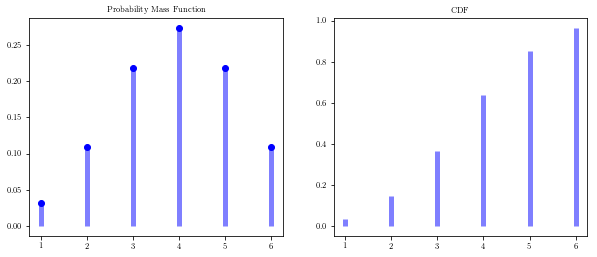

In [68]:
def binomial(sample, p_success):
    d = scipy.stats.binom(sample, p_success)
    x = np.arange(d.ppf(0.01), d.ppf(0.99))
    plot_dist(x, d, continuous=False)
    plt.show()
    return

interact(binomial, sample=(1,200,1), p_success=(0.01,1,0.01)); # comment if ipywidget is not installed / does not work
# binomial(10,0.2)   # Run this command if ipywidget does not work - modify params

### Hypergeometric

This is a cousin of the binomial distribution. It describes the probability of $k$ successes (random draws for which the object drawn has a specified feature) in $n$ draws, *without replacement*, from a finite population of size $N$ that contains exactly $K$ objects with that feature, wherein each draw is either a success or a failure. 


$$
Hyp(k |\,N,\,K,\,n) = \frac{\binom{K}{n} \binom{N-K}{n-k} }{\binom{N}{n}}
$$

**Parameters:**   

* $N$ : the population size,
* $K$ : the number of success states in the population,
* $n$ : the number of draws,

Expectation: $n \frac{K}{N}$

Standard Deviation: $\sqrt{n\,\frac{K}{N}\,\frac{N-K}{N}\,\frac{N-n}{N-1} }$

**Examples:**    
- Urn with equal number of white / black ball *without* replacement 
- Stars in a field: you randomly target a subsample of them (once) for spectroscopy. Success = star of a specific type. 

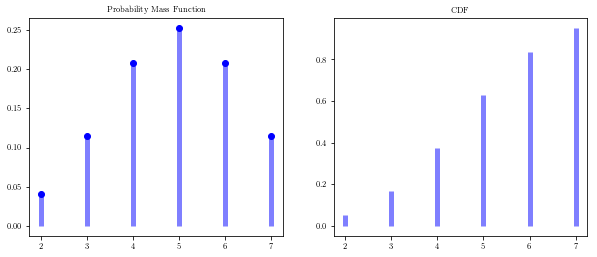

In [45]:
def hypergeom(sample, success, n_drawn):
    d = scipy.stats.hypergeom(sample, success, n_drawn)
    x = np.arange(d.ppf(0.01), d.ppf(0.99))
    plot_dist(x, d, continuous=False)
    plt.show()
    return

# Success, here is the number of times you got a success

interact(hypergeom, sample=(1,200,1), success=(0, 199, 1), n_drawn=(1, 200, 1)); # comment if ipywidget is not installed / does not work
# hypergeom(sample=200, success=10, n_drawn=100)   # Run this command if ipywidget does not work - modify params
# Try with
# Sample = 200 ; success = 10 (10/200 stars of desired type), n_drawn=100 ; 
# Compare with binomial using sample = 100,success = 200/10 = 0.05

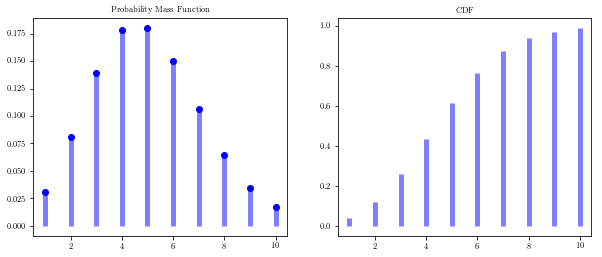

In [64]:
binomial(100,0.05)

## Poisson distribution

This is a special case of the binomial distribution, when the number $N$ of trials goes to infinity, but the fraction of success (rate of an event) remains small. 

$$
\rm{Pois}(k\,|\,\mu) = \frac{\mu^ke^{-\mu}}{k!}
$$

**Parameters:** $\mu$ - Anticipated number of (random) events

Expectation: $\mu$

Standard Deviation: $\sqrt{\mu}$
  
**Example**: This is an important distribution in astronomy because it describes the distribution of the number of photons counted in a given interval. X-ray photons (especially of faint X-ray sources !) strictly follow Poisson distribution. When there are many photons, the distribution becomes close to a gaussian $N(\mu, \sqrt{\mu})$. 

**Note:** Originally Poisson distribution was developed to study the chance of a Prussian cavalryman to be killed by the kick of a horse. A relatively rare event.   

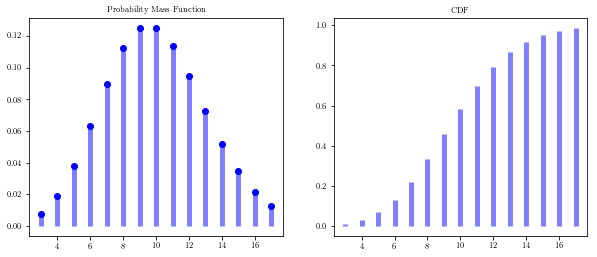

In [46]:
def poisson(m):
    d = scipy.stats.poisson(m)
    x = np.arange(d.ppf(0.01), d.ppf(0.99))
    plot_dist(x, d, continuous=False)
    plt.show()
    return

interact(poisson, m=(1,20,1));  # comment if ipywidget is not installed / does not work
# poisson(10)   # Run this command if ipywidget does not work - modify params

## Geometric distribution

The probability distribution of the number $k$ of Bernoulli trials needed to get one success. 

$$
Geom(k\,|\,p) = (1-p)^{(k-1)}\,p   ~~~~~~~ {\rm{for\,}} k\,{\rm{in}}\, \{1, 2, 3, ...\}
$$

**Parameters:** $p$, the probability of a single success

Expectation: $\frac{1}{p}$

Standard Deviation: $\sqrt{\frac{1-p}{p^2}}$

**Example:** How many times should I try flipping a coin before getting a success ? 

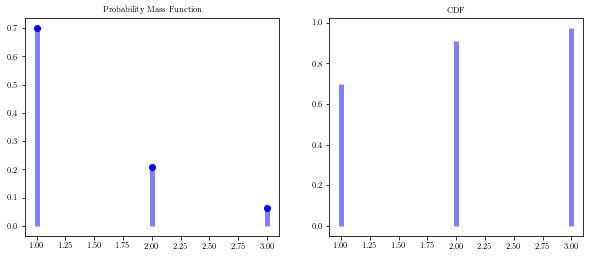

In [69]:
def geometric(p):
    d = scipy.stats.geom(p)
    x = np.arange(d.ppf(0.01), d.ppf(0.99))
    plot_dist(x, d, continuous=False)
    plt.show()
    return

interact(geometric, p=(0.,1.,0.05));   # comment if ipywidget is not installed / does not work
# geometric(0.35)   # Run this command if ipywidget does not work - modify params


## Gaussian or normal distribution

$$
N(x | \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}
$$

**Parameters:** 

* $\mu$ : central peak location
* $\sigma$: peak width

Expectation: $\mu$

Standard Deviation: $\sigma$

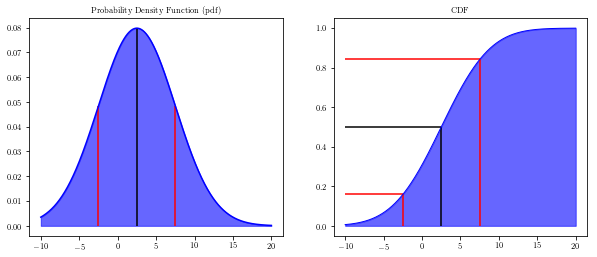

In [4]:
def normal(mu,sigma):
    x = np.linspace(-10, 20, 2000)
    n = scipy.stats.norm(mu, sigma)
    plot_dist(x,n, distname='gauss')
    plt.show()
    return

interact(normal, mu=(-5.,10.), sigma=(0.001, 10.0)); # comment if ipywidget is not installed / does not work
# normal(mu=0, sigma=5)   # Run this command if ipywidget does not work - modify params


### Change of variable for a normal distribution

Instead of considering a normal distribution of mean $\mu$ and width $\sigma$, one generally make a change of variable to end up to a "canonical" gaussian pdf centered in 0, and of width $\sigma=1$, i.e. $N(0,1)$. 
If we write $y = (x-\mu)/\sigma$, then we have:

$$
N(0,1) \, = \frac{1}{\sqrt{2\pi}} \, exp(-0.5\,y^2)
$$


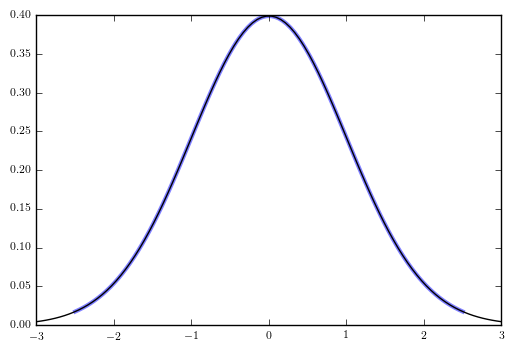

In [21]:
# Illustration: distribution of (x-\mu)/sigma
x = np.linspace(0, 10, 100)
mu, sigma = 5, 2 
y = (x-mu)/sigma
Nman = 1./np.sqrt(2*np.pi) * np.exp(-0.5*y**2)
plt.figure()
plt.plot(y, Nman, alpha=0.5, lw=3)

x2 = np.linspace(-3,3,100.)
n_scipy = scipy.stats.norm()
plt.plot(x2, n_scipy.pdf(x2), color='black')
plt.show()

## Chi square ($\chi^2$) distribution   <a class="anchor" id="chi2"></a>

If {x_i} are drawn from a gaussian distribution $N(\mu, \sigma)$, and if we define $z_i = (x - \mu)/\sigma$, and
$Q = \sum_{i=1}^{N} z_i^2$, the $\chi^2$ distribution, with $k$ degrees of freedom is:      

$$
p(Q/k) \equiv \chi^2(Q \, |\, k) =  \frac{1} {(2\,\Gamma(k/2))}  (Q/2)^{k/2-1}  \exp(-Q/2)
$$

**Parameters:** $k$  (dof)

Expectation: $k$ 

Standard deviation: $\sqrt{2\,k}$ 

Note that $\Gamma(k) \, \equiv \, (k-1)!$ ($k>0$). 

It is convenient to define $\chi^2_{{\rm dof}} \, \equiv \, \chi^2(Q/k \, |\, k)$ which has a mean of 1, and a standard deviation $\sqrt{2 / k}$. 

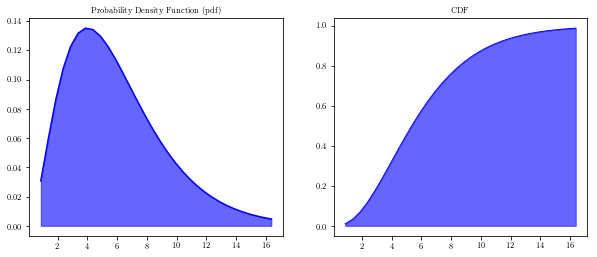

In [54]:
def chi2(k):
    d = scipy.stats.chi2(k)
    x = np.arange(d.ppf(0.01), d.ppf(0.99), 0.5)
    plot_dist(x, d, continuous=True)
    plt.show()
    return

interact(chi2, k=(1,20,1));

## Student's distribution

$$
p(x \, | \, k) = \frac{\Gamma(\frac{k+1}{2})}{\sqrt{\pi\,k} \, \Gamma(k/2)} \, \left( 1 + \frac{x^2}{k} \right)^{-\frac{k+1}{2} },
$$

**Parameters:** $k$ $\equiv$ number of degrees of freedom (sometimes also writen $\nu$). 

Expectation: 0 (if $k > 1$, undefined if $k=1$)

Standard deviation: $\sqrt{k/(k-2)}$ if $k > 2$


If we take a sample on N measurement $\{x_i\}$ drawn from from a gaussian $N(\mu, \sigma)$, the random variable:

$$
t = \frac{\bar{x} \,-\, \mu }{\hat{\sigma}/\sqrt{N}}
$$

follows a Student's $t(k)$ distribution with $k = N-1$ dof. 

Note in the above formula, $\bar{x}$ is an estimator of the mean $\mu$ and $\hat{\sigma} = \frac{1}{\sqrt{N-1}} \sqrt{\sum_i(x_i-\bar{x})^2}$, i.e. $\hat{\sigma}$ is the *estimator* of the standard deviation. 

Don't be confused ! The random variable:
$$
y = \frac{\bar{x} \,-\, \mu }{\sigma/\sqrt{N}},
$$
where $\sigma$ is the "true" (population) std dev of the distribution, follows a normal distribution $N(0, 1)$, not a Student's distribution. 

**Example**: The student's distribution is useful when calculating confidence interval or ratios of random variables drawn from normal distributions. 

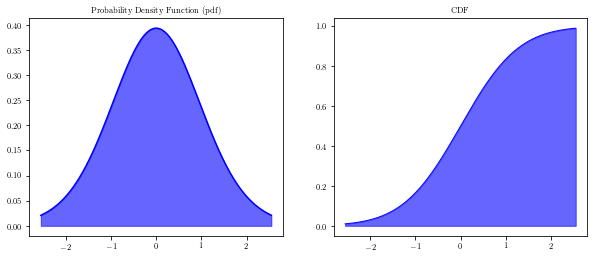

In [5]:
def student(k):
    d = scipy.stats.t(k)
    x = np.arange(d.ppf(0.01), d.ppf(0.99), 0.01)
    plot_dist(x, d, continuous=True)
    plt.show()
    return

interact(student, k=(0,20,0.5) );

# X. References and supplementary material:

Chapter 3 (3.2) of the book *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy.

Relationships between probability density distributions: http://www.math.wm.edu/~leemis/chart/UDR/UDR.html 

Common PDF: the crib sheet: http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet

*All of statistics: a concise course in statistical inference*, Wasserman 2004 (see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/).

Numerical recipes by Press et al. Cambridge University press: Chapter 14